<a href="https://colab.research.google.com/github/gabrielborja/python_data_analysis/blob/main/food_habits_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Food habits analytics

## Uploading packages and data

In [1]:
#Importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
#Customizing data visualization styles
sns.set_theme(rc = {'figure.figsize': (12, 4)})

In [7]:
#Remove previous versions of the uploaded excel file
!rm food_habits.xlsx

In [8]:
#Uploading file from local drive
from google.colab import files
uploaded1 = files.upload()

Saving food_habits.xlsx to food_habits.xlsx


In [9]:
#Storing dataset in a Pandas Dataframe
import io
df1 = pd.read_excel(io.BytesIO(uploaded1['food_habits.xlsx'])) #==> setting Event (datetime) as index to perform date slicing

In [10]:
#Checking the dataframe info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        78 non-null     datetime64[ns]
 1   time        78 non-null     object        
 2   food        78 non-null     object        
 3   large_meal  78 non-null     int64         
 4   void_ev     78 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.2+ KB


##Data Manipulation

In [11]:
#Transforming to list
list_1 = df1['food'].str.cat(sep=', ').split(", ")
list_1[:10]

['bread',
 'pepperoni',
 'ham',
 'cheese',
 'ricotta',
 'mustard',
 'hot_sauce',
 'potato_chips',
 'pizza',
 'tomato_sauce']

In [ ]:
#Building dictionary of occurrences for each food
import collections
occurrences = collections.Counter(list_1)
occurrences

In [13]:
#Transforming list of foods into series
foods_1 = pd.Series(data=list_1)
foods_1.tail()

1102        lettuce
1103    red_paprika
1104        sausage
1105          pesto
1106    kebap_sauce
dtype: object

In [22]:
#Counting most popular foods
top_food_1 = foods_1.value_counts().reset_index(name='Count').rename(columns={'index':'Food'})
top_food_1.head()

,Food,Count
0,cheese,45
1,rice,40
2,chocolate,37
3,onion,35
4,soda,30


##Data Visualization

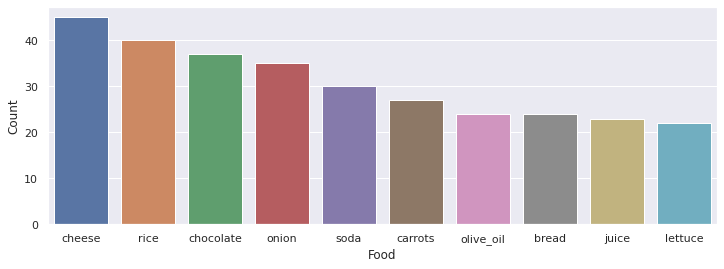

In [25]:
#Plotting the top 10 foods
sns.barplot(x='Food', y='Count', data=top_food_1[:10])
plt.show()

In [ ]:
#Exporting to excel into local disk
from google.colab import files
df1.to_excel('food_habits.xlsx', index=False) #==> Excluding index from file
files.download('food_habits.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>